In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('data/kc_house_data.csv')
df = df.drop(['id','date'], axis = 1)

X = df.drop(['price'], axis = 1)
y = df['price']

X = pd.get_dummies(data = X, columns = ['waterfront'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2021)

In [5]:
from sklearn.ensemble import BaggingRegressor
model_bag_reg = BaggingRegressor()
model_bag_reg.fit(X_train, y_train)
print(model_bag_reg.score(X_train, y_train))
print(model_bag_reg.score(X_test, y_test))

0.9518102380206253
0.7442944609585675


In [7]:
# out of bag 샘플을 활용한 성능 측정
model_bag_reg_oob = BaggingRegressor(n_estimators = 100, oob_score = True) # 100개의 분류기
model_bag_reg_oob.fit(X,y)
print(f"oob score : {model_bag_reg_oob.oob_score_}")

oob score : 0.7538787915459161


In [9]:
# 홀드아웃 기법
model_bag_reg = BaggingRegressor(n_estimators = 100) # 100개의 분류기
model_bag_reg.fit(X_train,y_train)
print(model_bag_reg.score(X_train, y_train))
print(model_bag_reg.score(X_test, y_test))

0.9641174413815057
0.7607720704143215


In [16]:
# 변수의 중요도 확인
# feature_importances가 클 수록 회귀계수에 큰 영향, 분류기에 큰 영향
from sklearn import tree
model_bag_reg.estimators_[0].feature_importances_

array([0.00723882, 0.01980069, 0.23344346, 0.04280694, 0.00490468,
       0.01379537, 0.01053563, 0.39788915, 0.0199971 , 0.01273498,
       0.09407547, 0.00313086, 0.06739365, 0.0431656 , 0.01832363,
       0.01076397])

In [18]:
import numpy as np
importances = pd.DataFrame(np.mean([tree.feature_importances_ for tree in model_bag_reg.estimators_], axis = 0))
feature_importances = pd.concat([pd.DataFrame(X.columns), importances], axis = 1)
feature_importances.columns = ['col_name', 'feature_importance']
feature_importances
# 변수의 상대적 중요도를 보았을 때, 회귀 계수 처럼 파악을 할 수 있다.
# 변수 중요다가 큰 것을 판단할 수 있다.

,col_name,feature_importance
0,bedrooms,0.008552
1,bathrooms,0.022171
2,sqft_living,0.271522
3,sqft_lot,0.034706
4,floors,0.005862
5,view,0.022855
6,condition,0.006779
7,grade,0.354782
8,sqft_above,0.026353
9,sqft_basement,0.012748


In [19]:
 feature_importances = feature_importances.sort_values(by = 'feature_importance', ascending=False).reset_index(drop = True)

In [20]:
feature_importances

,col_name,feature_importance
0,grade,0.354782
1,sqft_living,0.271522
2,yr_built,0.102777
3,sqft_living15,0.063257
4,sqft_lot15,0.043674
5,sqft_lot,0.034706
6,sqft_above,0.026353
7,view,0.022855
8,bathrooms,0.022171
9,sqft_basement,0.012748


In [21]:
import matplotlib.pyplot as plt

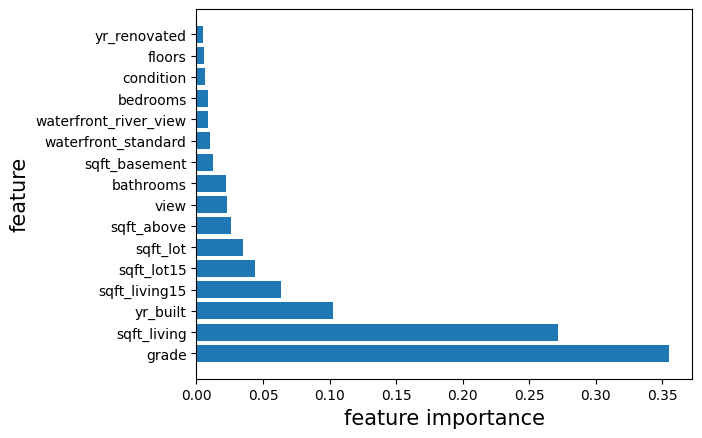

In [22]:
plt.barh(feature_importances['col_name'], feature_importances['feature_importance'], align = 'center')
plt.xlabel('feature importance', size = 15)
plt.ylabel('feature', size = 15)
plt.show()

In [ ]:
# 의사결정나무 기반(배깅, 부스팅, 랜던포레스트) 알고리즘은 회귀계수를 직접 추출 X > 설명력은 낮지만 > 정확도는 높다.